In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Dataset//EC11K_Znorm//191212_EC11K_individual_drugs"

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2785749697484080924
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 18038862643
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11738814902518128148
physical_device_desc: "device: 0, name: TITAN RTX, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
file_list = os.listdir(workdir)

In [4]:
drug_list = []
for x in range(len(file_list)):
    drug_file = file_list[x].split("_")[2].split(".")[0]
    drug_list.append(drug_file)

In [5]:
len(drug_list[0:12])

12

In [6]:
# In[21]:

num_classes = 1
learning_rate = 0.0002
training_epochs = 40
batch_size = 50
# img_rows, img_cols = 154, 154


17-AAG_//n
train_X shape: (392, 18988, 1)
392 train samples
98 test samples
StartTime : 2019-12-12 22:04:51.050902
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
EndTime : 2019-12-12 22:04:53.941902
StartTime : 2019-12-12 22:04:53.942902
Instructions for updating:
Use tf.cast instead.
Train on 392 samples, validate on 98 samples
Epoch 1/40
392/392 [==============================] - 10s 24ms/step - loss: 3.7163 - mean_squared_error: 3.7163 - mean_absolute_error: 1.5794 - val_loss: 3.1262 - val_mean_squared_error: 3.1262 - val_mean_absolute_error: 1.4086
Epoch 2/40
392/392 [==============================] - 1s 2ms/step - loss: 2.1598 - mean_squared_error: 2.1598 - mean_absolute_error: 1.1886 - val_loss: 3.3157 - val_mean_squared_error: 3.3157 - val_mean_absolute_error: 1.4786
Epoch 3/40
392/392 [==============================] - 1s 2ms/step - loss: 1

Epoch 32/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3475 - mean_squared_error: 0.3475 - mean_absolute_error: 0.4529 - val_loss: 2.1361 - val_mean_squared_error: 2.1361 - val_mean_absolute_error: 1.1544
Epoch 33/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3981 - mean_squared_error: 0.3981 - mean_absolute_error: 0.4867 - val_loss: 2.1493 - val_mean_squared_error: 2.1493 - val_mean_absolute_error: 1.1567
Epoch 34/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3757 - mean_squared_error: 0.3757 - mean_absolute_error: 0.4660 - val_loss: 2.1415 - val_mean_squared_error: 2.1415 - val_mean_absolute_error: 1.1531
Epoch 35/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3640 - mean_squared_error: 0.3640 - mean_absolute_error: 0.4731 - val_loss: 2.1314 - val_mean_squared_error: 2.1314 - val_mean_absolute_error: 1.1536
Epoch 36/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3300 - mean_squ

392/392 [==============================] - 1s 2ms/step - loss: 0.3776 - mean_squared_error: 0.3776 - mean_absolute_error: 0.4774 - val_loss: 0.8272 - val_mean_squared_error: 0.8272 - val_mean_absolute_error: 0.7523
Epoch 27/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3203 - mean_squared_error: 0.3203 - mean_absolute_error: 0.4467 - val_loss: 0.8265 - val_mean_squared_error: 0.8265 - val_mean_absolute_error: 0.7482
Epoch 28/40
392/392 [==============================] - 1s 2ms/step - loss: 0.2773 - mean_squared_error: 0.2773 - mean_absolute_error: 0.4137 - val_loss: 0.8055 - val_mean_squared_error: 0.8055 - val_mean_absolute_error: 0.7436
Epoch 29/40
392/392 [==============================] - 1s 2ms/step - loss: 0.2908 - mean_squared_error: 0.2908 - mean_absolute_error: 0.4101 - val_loss: 0.7937 - val_mean_squared_error: 0.7937 - val_mean_absolute_error: 0.7337
Epoch 30/40
392/392 [==============================] - 1s 2ms/step - loss: 0.2956 - mean_squared_error: 

Epoch 21/40
392/392 [==============================] - 1s 2ms/step - loss: 0.4134 - mean_squared_error: 0.4134 - mean_absolute_error: 0.5183 - val_loss: 0.7311 - val_mean_squared_error: 0.7311 - val_mean_absolute_error: 0.7042
Epoch 22/40
392/392 [==============================] - 1s 2ms/step - loss: 0.4292 - mean_squared_error: 0.4292 - mean_absolute_error: 0.5221 - val_loss: 0.7177 - val_mean_squared_error: 0.7177 - val_mean_absolute_error: 0.6926
Epoch 23/40
392/392 [==============================] - 1s 2ms/step - loss: 0.4134 - mean_squared_error: 0.4134 - mean_absolute_error: 0.4995 - val_loss: 0.6982 - val_mean_squared_error: 0.6982 - val_mean_absolute_error: 0.6672
Epoch 24/40
392/392 [==============================] - 1s 2ms/step - loss: 0.4706 - mean_squared_error: 0.4706 - mean_absolute_error: 0.5239 - val_loss: 0.6992 - val_mean_squared_error: 0.6992 - val_mean_absolute_error: 0.6559
Epoch 25/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3646 - mean_squ

392/392 [==============================] - 1s 2ms/step - loss: 0.6806 - mean_squared_error: 0.6806 - mean_absolute_error: 0.6548 - val_loss: 2.6813 - val_mean_squared_error: 2.6813 - val_mean_absolute_error: 1.3519
Epoch 16/40
392/392 [==============================] - 1s 2ms/step - loss: 0.6164 - mean_squared_error: 0.6164 - mean_absolute_error: 0.6296 - val_loss: 2.5297 - val_mean_squared_error: 2.5297 - val_mean_absolute_error: 1.2760
Epoch 17/40
392/392 [==============================] - 1s 2ms/step - loss: 0.6106 - mean_squared_error: 0.6106 - mean_absolute_error: 0.6195 - val_loss: 2.5271 - val_mean_squared_error: 2.5271 - val_mean_absolute_error: 1.2720
Epoch 18/40
392/392 [==============================] - 1s 2ms/step - loss: 0.5363 - mean_squared_error: 0.5363 - mean_absolute_error: 0.5635 - val_loss: 2.5048 - val_mean_squared_error: 2.5048 - val_mean_absolute_error: 1.2604
Epoch 19/40
392/392 [==============================] - 1s 2ms/step - loss: 0.5915 - mean_squared_error: 

Epoch 10/40
392/392 [==============================] - 1s 2ms/step - loss: 0.6140 - mean_squared_error: 0.6140 - mean_absolute_error: 0.6260 - val_loss: 0.6949 - val_mean_squared_error: 0.6949 - val_mean_absolute_error: 0.7443
Epoch 11/40
392/392 [==============================] - 1s 2ms/step - loss: 0.4972 - mean_squared_error: 0.4972 - mean_absolute_error: 0.5439 - val_loss: 0.6738 - val_mean_squared_error: 0.6738 - val_mean_absolute_error: 0.7248
Epoch 12/40
392/392 [==============================] - 1s 2ms/step - loss: 0.5476 - mean_squared_error: 0.5476 - mean_absolute_error: 0.5790 - val_loss: 0.6512 - val_mean_squared_error: 0.6512 - val_mean_absolute_error: 0.7059
Epoch 13/40
392/392 [==============================] - 1s 2ms/step - loss: 0.4770 - mean_squared_error: 0.4770 - mean_absolute_error: 0.5504 - val_loss: 0.6773 - val_mean_squared_error: 0.6773 - val_mean_absolute_error: 0.7208
Epoch 14/40
392/392 [==============================] - 1s 2ms/step - loss: 0.5147 - mean_squ

244/244 [==============================] - 0s 2ms/step - loss: 1.5595 - mean_squared_error: 1.5595 - mean_absolute_error: 1.0367 - val_loss: 3.1483 - val_mean_squared_error: 3.1483 - val_mean_absolute_error: 1.4413
Epoch 5/40
244/244 [==============================] - 0s 2ms/step - loss: 1.1762 - mean_squared_error: 1.1762 - mean_absolute_error: 0.9042 - val_loss: 3.1796 - val_mean_squared_error: 3.1796 - val_mean_absolute_error: 1.4426
Epoch 6/40
244/244 [==============================] - 1s 2ms/step - loss: 1.1488 - mean_squared_error: 1.1488 - mean_absolute_error: 0.8690 - val_loss: 3.1340 - val_mean_squared_error: 3.1340 - val_mean_absolute_error: 1.4325
Epoch 7/40
244/244 [==============================] - 1s 2ms/step - loss: 0.9803 - mean_squared_error: 0.9803 - mean_absolute_error: 0.8100 - val_loss: 3.0560 - val_mean_squared_error: 3.0560 - val_mean_absolute_error: 1.4205
Epoch 8/40
244/244 [==============================] - 1s 2ms/step - loss: 1.0309 - mean_squared_error: 1.03

244/244 [==============================] - 0s 2ms/step - loss: 0.3238 - mean_squared_error: 0.3238 - mean_absolute_error: 0.4471 - val_loss: 2.5345 - val_mean_squared_error: 2.5345 - val_mean_absolute_error: 1.3191
EndTime : 2019-12-12 22:09:41.231902
Irinotecan’s final rmse value is = 1.592017
Irinotecan R-squared value is = -0.063554
L-685458_//n
train_X shape: (382, 18988, 1)
382 train samples
96 test samples
StartTime : 2019-12-12 22:09:43.385902
EndTime : 2019-12-12 22:09:48.205902
StartTime : 2019-12-12 22:09:48.205902
Train on 382 samples, validate on 96 samples
Epoch 1/40
382/382 [==============================] - 13s 33ms/step - loss: 4.2305 - mean_squared_error: 4.2305 - mean_absolute_error: 1.8914 - val_loss: 4.8854 - val_mean_squared_error: 4.8854 - val_mean_absolute_error: 2.1177
Epoch 2/40
382/382 [==============================] - 1s 2ms/step - loss: 3.8750 - mean_squared_error: 3.8750 - mean_absolute_error: 1.7765 - val_loss: 6.0801 - val_mean_squared_error: 6.0801 - va

382/382 [==============================] - 1s 2ms/step - loss: 0.3376 - mean_squared_error: 0.3376 - mean_absolute_error: 0.4356 - val_loss: 0.8605 - val_mean_squared_error: 0.8605 - val_mean_absolute_error: 0.8737
Epoch 35/40
382/382 [==============================] - 1s 2ms/step - loss: 0.2603 - mean_squared_error: 0.2603 - mean_absolute_error: 0.3958 - val_loss: 0.8240 - val_mean_squared_error: 0.8240 - val_mean_absolute_error: 0.8511
Epoch 36/40
382/382 [==============================] - 1s 2ms/step - loss: 0.2775 - mean_squared_error: 0.2775 - mean_absolute_error: 0.4219 - val_loss: 0.7970 - val_mean_squared_error: 0.7970 - val_mean_absolute_error: 0.8332
Epoch 37/40
382/382 [==============================] - 1s 2ms/step - loss: 0.3231 - mean_squared_error: 0.3231 - mean_absolute_error: 0.4408 - val_loss: 0.7766 - val_mean_squared_error: 0.7766 - val_mean_absolute_error: 0.8181
Epoch 38/40
382/382 [==============================] - 1s 2ms/step - loss: 0.3035 - mean_squared_error: 

392/392 [==============================] - 1s 2ms/step - loss: 0.4086 - mean_squared_error: 0.4086 - mean_absolute_error: 0.4763 - val_loss: 1.0111 - val_mean_squared_error: 1.0111 - val_mean_absolute_error: 0.8907
Epoch 29/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3490 - mean_squared_error: 0.3490 - mean_absolute_error: 0.4504 - val_loss: 0.9782 - val_mean_squared_error: 0.9782 - val_mean_absolute_error: 0.8694
Epoch 30/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3631 - mean_squared_error: 0.3631 - mean_absolute_error: 0.4677 - val_loss: 0.9452 - val_mean_squared_error: 0.9452 - val_mean_absolute_error: 0.8442
Epoch 31/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3988 - mean_squared_error: 0.3988 - mean_absolute_error: 0.4920 - val_loss: 0.9040 - val_mean_squared_error: 0.9040 - val_mean_absolute_error: 0.8141
Epoch 32/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3330 - mean_squared_error: 

Epoch 23/40
392/392 [==============================] - 1s 2ms/step - loss: 0.5129 - mean_squared_error: 0.5129 - mean_absolute_error: 0.5658 - val_loss: 1.7733 - val_mean_squared_error: 1.7733 - val_mean_absolute_error: 1.1059
Epoch 24/40
392/392 [==============================] - 1s 2ms/step - loss: 0.4278 - mean_squared_error: 0.4278 - mean_absolute_error: 0.5135 - val_loss: 1.7472 - val_mean_squared_error: 1.7472 - val_mean_absolute_error: 1.0917
Epoch 25/40
392/392 [==============================] - 1s 2ms/step - loss: 0.5170 - mean_squared_error: 0.5170 - mean_absolute_error: 0.5494 - val_loss: 1.7105 - val_mean_squared_error: 1.7105 - val_mean_absolute_error: 1.0687
Epoch 26/40
392/392 [==============================] - 1s 2ms/step - loss: 0.4929 - mean_squared_error: 0.4929 - mean_absolute_error: 0.5469 - val_loss: 1.6737 - val_mean_squared_error: 1.6737 - val_mean_absolute_error: 1.0345
Epoch 27/40
392/392 [==============================] - 1s 2ms/step - loss: 0.4755 - mean_squ

325/325 [==============================] - 1s 2ms/step - loss: 0.6405 - mean_squared_error: 0.6405 - mean_absolute_error: 0.6094 - val_loss: 1.3634 - val_mean_squared_error: 1.3634 - val_mean_absolute_error: 0.7954
Epoch 18/40
325/325 [==============================] - 1s 2ms/step - loss: 0.5194 - mean_squared_error: 0.5194 - mean_absolute_error: 0.5609 - val_loss: 1.3233 - val_mean_squared_error: 1.3233 - val_mean_absolute_error: 0.7747
Epoch 19/40
325/325 [==============================] - 1s 2ms/step - loss: 0.5606 - mean_squared_error: 0.5606 - mean_absolute_error: 0.5852 - val_loss: 1.3004 - val_mean_squared_error: 1.3004 - val_mean_absolute_error: 0.7397
Epoch 20/40
325/325 [==============================] - 1s 2ms/step - loss: 0.5229 - mean_squared_error: 0.5229 - mean_absolute_error: 0.5577 - val_loss: 1.2660 - val_mean_squared_error: 1.2660 - val_mean_absolute_error: 0.7152
Epoch 21/40
325/325 [==============================] - 1s 2ms/step - loss: 0.4745 - mean_squared_error: 

392/392 [==============================] - 1s 2ms/step - loss: 2.2104 - mean_squared_error: 2.2104 - mean_absolute_error: 1.3639 - val_loss: 3.0104 - val_mean_squared_error: 3.0104 - val_mean_absolute_error: 1.7112
Epoch 12/40
392/392 [==============================] - 1s 2ms/step - loss: 2.0040 - mean_squared_error: 2.0040 - mean_absolute_error: 1.2728 - val_loss: 2.8099 - val_mean_squared_error: 2.8099 - val_mean_absolute_error: 1.6516
Epoch 13/40
392/392 [==============================] - 1s 3ms/step - loss: 1.7454 - mean_squared_error: 1.7454 - mean_absolute_error: 1.1855 - val_loss: 2.6169 - val_mean_squared_error: 2.6169 - val_mean_absolute_error: 1.5920
Epoch 14/40
392/392 [==============================] - 1s 2ms/step - loss: 1.5780 - mean_squared_error: 1.5780 - mean_absolute_error: 1.1285 - val_loss: 2.4518 - val_mean_squared_error: 2.4518 - val_mean_absolute_error: 1.5407
Epoch 15/40
392/392 [==============================] - 1s 2ms/step - loss: 1.3225 - mean_squared_error: 

392/392 [==============================] - 1s 2ms/step - loss: 6.6264 - mean_squared_error: 6.6264 - mean_absolute_error: 2.3793 - val_loss: 10.4168 - val_mean_squared_error: 10.4168 - val_mean_absolute_error: 3.0217
Epoch 6/40
392/392 [==============================] - 1s 2ms/step - loss: 6.1231 - mean_squared_error: 6.1231 - mean_absolute_error: 2.2813 - val_loss: 9.5167 - val_mean_squared_error: 9.5167 - val_mean_absolute_error: 2.8757
Epoch 7/40
392/392 [==============================] - 1s 2ms/step - loss: 5.3611 - mean_squared_error: 5.3611 - mean_absolute_error: 2.1434 - val_loss: 9.1345 - val_mean_squared_error: 9.1345 - val_mean_absolute_error: 2.8112
Epoch 8/40
392/392 [==============================] - 1s 2ms/step - loss: 4.7222 - mean_squared_error: 4.7222 - mean_absolute_error: 2.0280 - val_loss: 9.2454 - val_mean_squared_error: 9.2454 - val_mean_absolute_error: 2.8314
Epoch 9/40
392/392 [==============================] - 1s 2ms/step - loss: 4.5135 - mean_squared_error: 4.

Paclitaxel’s final rmse value is = 2.473117
Paclitaxel R-squared value is = -0.840465


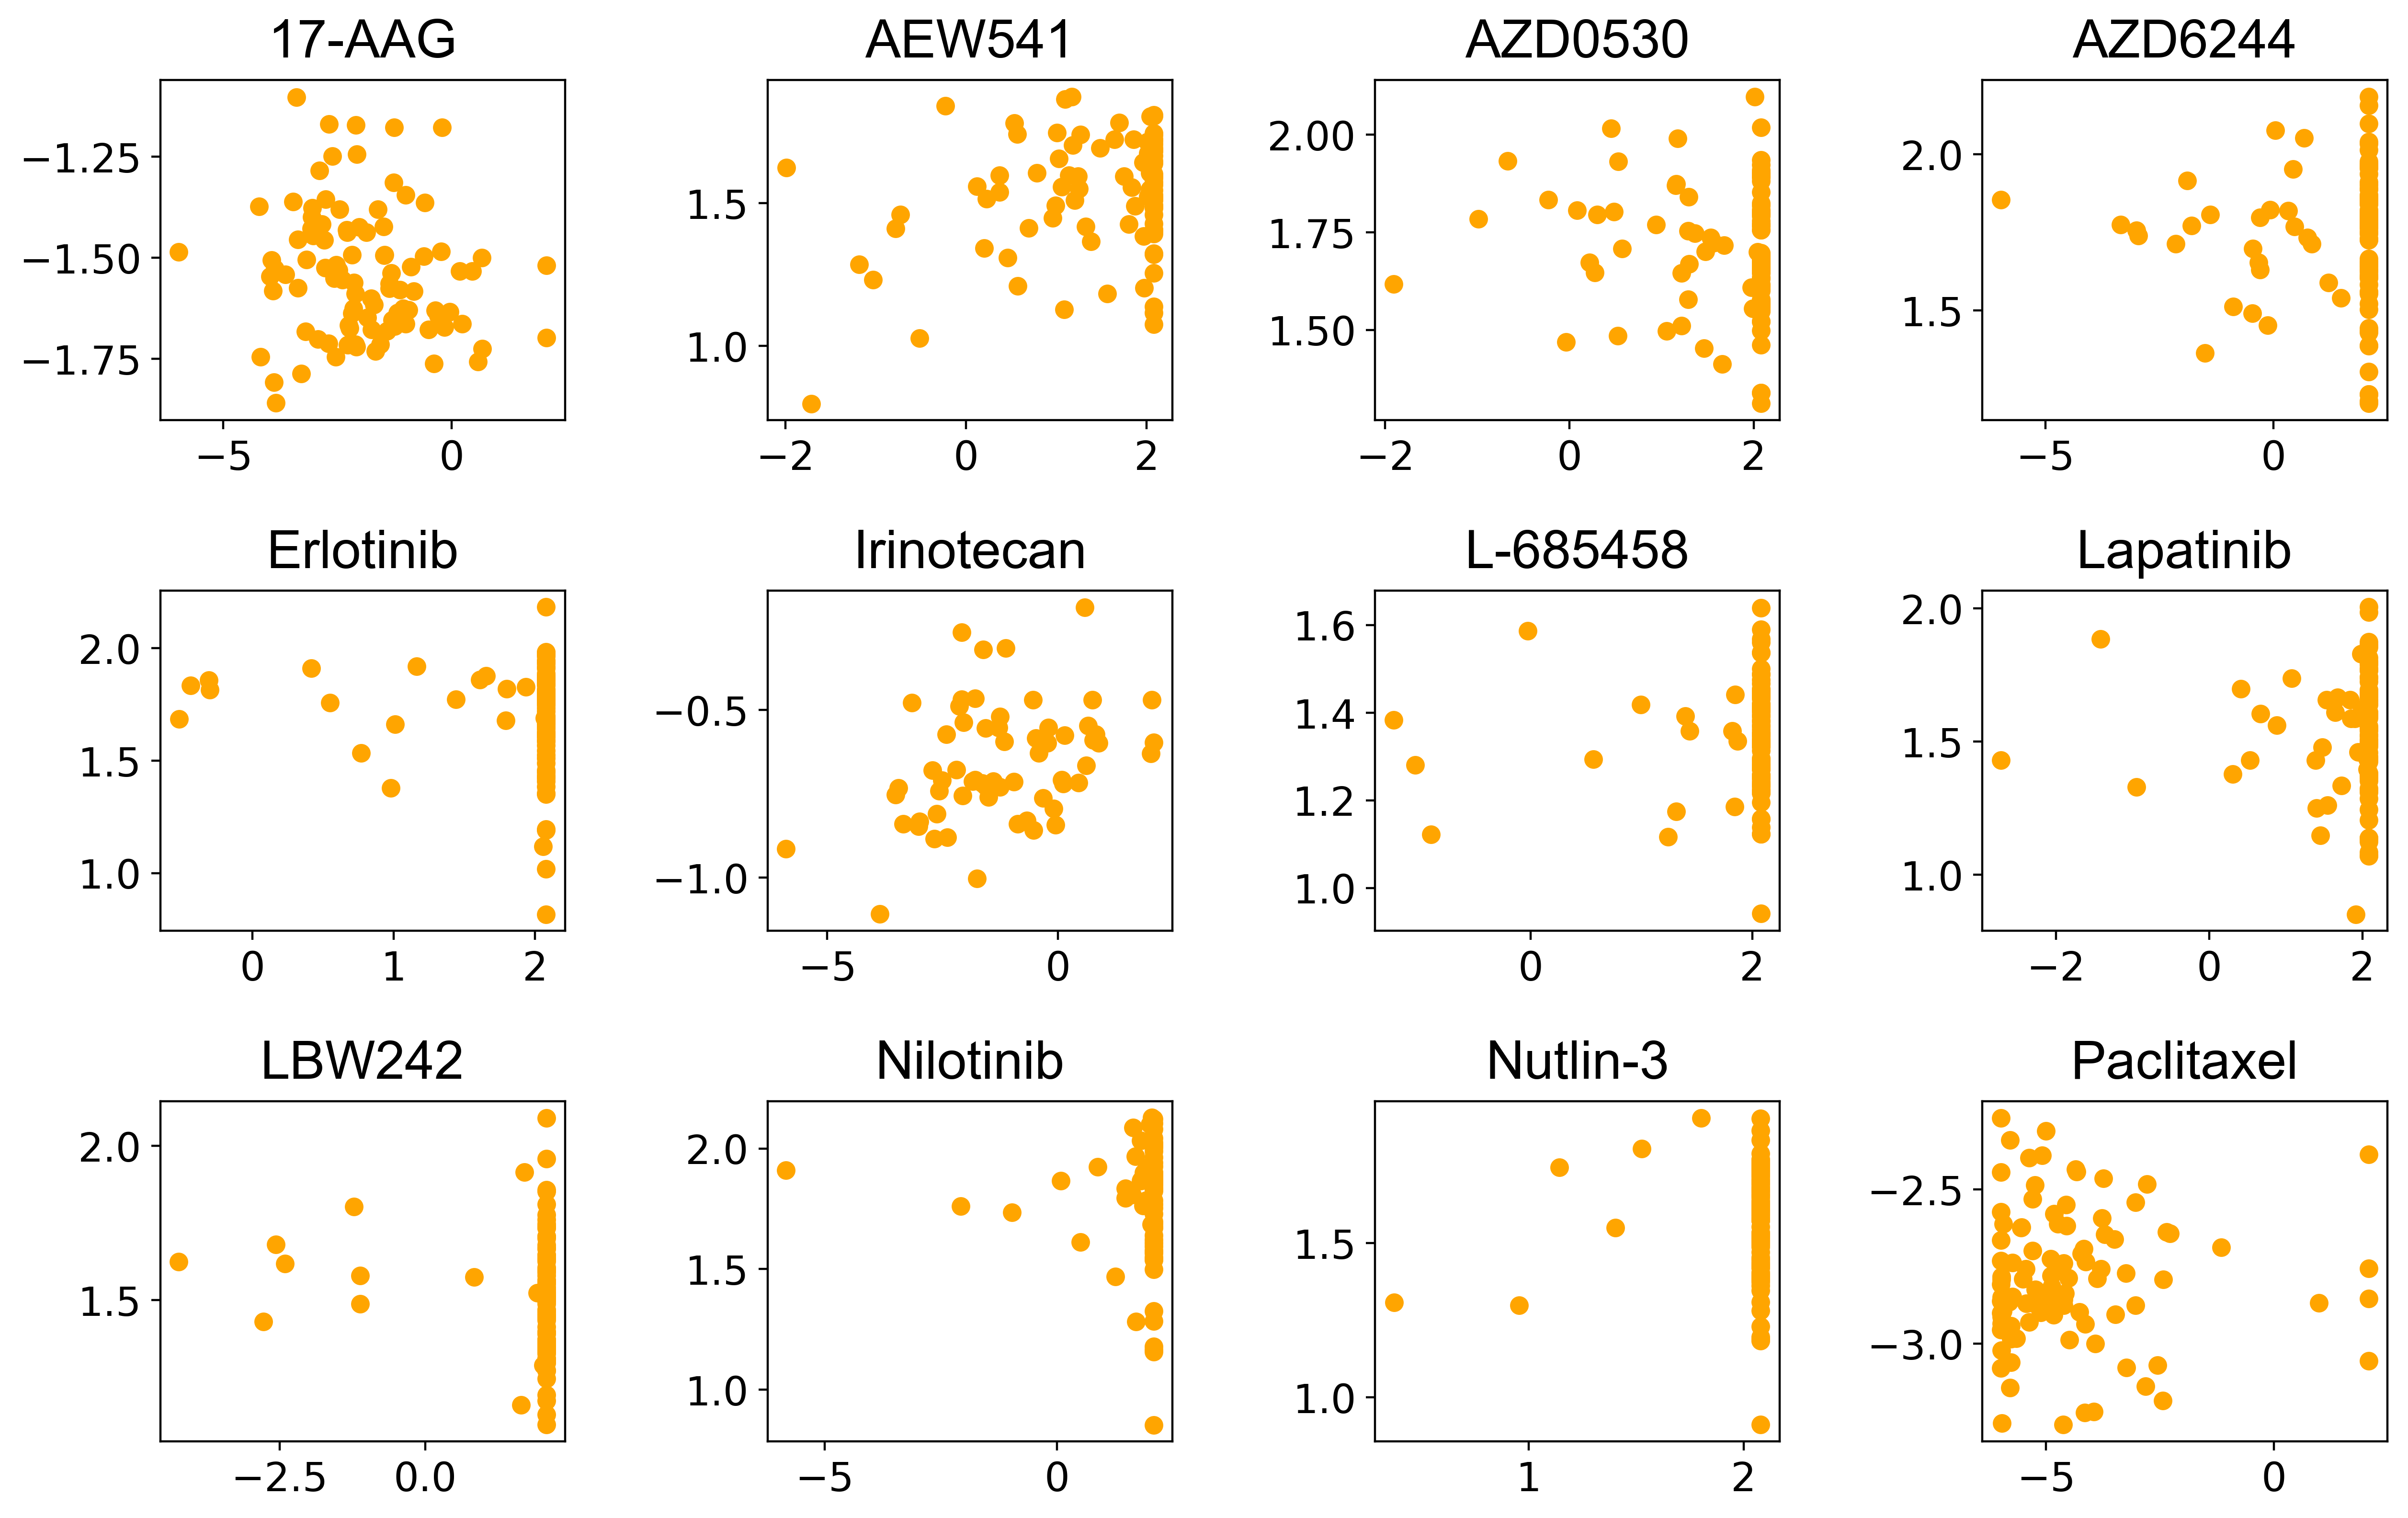

In [7]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for num in range(len(drug_list[12::])):
    dname = drug_list[num+11]
    print('%s_//n' % dname)
    dataset = np.load(workdir + "//191212_EC11K_%s.npz" % dname)
    x = dataset['x']
    y = dataset['y']
    train_X, test_X, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=42)
    
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
    
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # https://towardsdatascience.com/how-to-perform-lasso-and-lasso-regression-in-python-3b3b75541ad8
    # https://brunch.co.kr/@itschloe1/11
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    # In[10]:
    with K.tf.device('/GPU:0'):
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
        x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
    #     y = x
        x = Activation('tanh')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

    #     x = AveragePooling1D(pool_size=8)(x)
        x = Flatten()(x)
        x = Dense(units=2048, name='dense1'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout1') (x)
        x = Activation('relu')(x)

    #    x = Reshape((300,1))(x)

    #    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
    #    x = MaxPooling1D(pool_size=2)(x)
    #    x = BatchNormalization()(x)

        x = Dense(units=1024, name='dense5'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout5') (x)
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense6'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout6') (x)
        x = Activation('relu')(x)

        x = Dense(units=1024, name='dense7'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout7') (x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense8'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout8') (x)
        x = Activation('relu')(x)

        x = Dense(units=256, name='dense9'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout9') (x)
        x = Activation('relu')(x)

        x = Dense(units=128, name='dense10'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout10') (x)
        x = Activation('relu')(x)


        predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)
    #     predictions = Dense(1, activation='linear', name='predictions')(x)



        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=keras.optimizers.Adam(learning_rate),
                      metrics=['mse','mae'])
        EndTime8 = datetime.now()
        print("EndTime :", EndTime8)
    
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    with K.tf.device('/GPU:0'):
        model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                            validation_data=(test_X, test_y))

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
        
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Result//EC-11K_individual_drugs//191212//ResNet//one_drug_one_model"
    c.to_csv(workdir + '//%s_result.csv' % dname)
    
    
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num+1)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)

    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.7
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    # status initialize

    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = '0' 

    # out of memory
    import tensorflow as tf
    with tf.Graph().as_default():
      gpu_options = tf.GPUOptions(allow_growth=True)

    workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Dataset//EC11K_Znorm//191212_EC11K_individual_drugs"
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Result//EC-11K_individual_drugs//191212//ResNet"

plt.savefig(workdir +'//191210_EC11K_one_drug_one_model_other_12drugs_ResNet.png', dpi=400)
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Dataset//EC11K_Znorm//191212_EC11K_individual_drugs"

In [8]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [ ]:
result

In [9]:
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Result//EC-11K_individual_drugs//191212//ResNet"
result.to_csv(workdir +'//191212_EC11K_one_drug_one_model_ResNet_other_12drugs_metrics.csv')

In [10]:
x


<tf.Tensor 'activation_324/Relu:0' shape=(?, 128) dtype=float32>

In [11]:
num

11